# Problem Statement:
    
You are tasked with analyzing customer behavioral data for an e-commerce website. The goal is to cluster users based on their activity patterns and purchase preferences. The dataset contains six key features related to customer interactions, and the clustering analysis will help group similar users, allowing for more personalized marketing strategies.



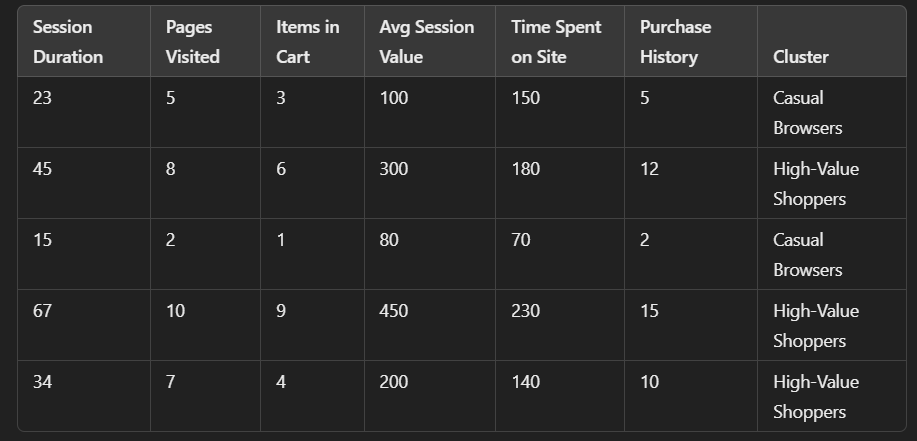



{0: 'High-Value Shoppers', 1: 'Casual Browsers'}


# Step 1: Create a Realistic Dummy Dataset

In [9]:
# Import necessary libraries
import pandas as pd

# Create a realistic dummy dataset with 6 features for an e-commerce platform
data = {
    'Session_Duration': [23, 45, 15, 67, 34, 23, 56, 23, 45, 12, 24, 38, 25, 32, 64, 58, 45, 43, 47, 52],
    'Pages_Visited': [5, 8, 2, 10, 7, 5, 9, 4, 6, 2, 5, 7, 3, 5, 9, 10, 8, 7, 6, 9],
    'Items_in_Cart': [3, 6, 1, 9, 4, 3, 7, 2, 5, 1, 4, 5, 2, 4, 8, 9, 7, 6, 5, 8],
    'Avg_Session_Value': [100, 300, 80, 450, 200, 110, 390, 90, 250, 60, 110, 230, 100, 180, 400, 410, 360, 320, 310, 380],
    'Time_Spent_on_Site': [150, 180, 70, 230, 140, 120, 200, 90, 170, 60, 110, 160, 100, 130, 240, 250, 210, 190, 180, 220],
    'Purchase_History': [5, 12, 2, 15, 10, 5, 14, 4, 10, 2, 6, 11, 3, 7, 13, 14, 12, 10, 11, 13]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()

,Session_Duration,Pages_Visited,Items_in_Cart,Avg_Session_Value,Time_Spent_on_Site,Purchase_History
0,23,5,3,100,150,5
1,45,8,6,300,180,12
2,15,2,1,80,70,2
3,67,10,9,450,230,15
4,34,7,4,200,140,10


# Explanation of Features:

Session_Duration: Total time (in minutes) spent on the site per session.
    
Pages_Visited: Number of pages visited during the session.
    
Items_in_Cart: Number of items added to the cart.
    
Avg_Session_Value: Average monetary value of the session (in USD).
    
Time_Spent_on_Site: Total time spent on the website across all sessions (in minutes).
    
Purchase_History: Total number of purchases made by the customer on the platform.
    
    
# Step 2: Import Required Libraries for Clustering

In [10]:
# Import libraries for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_data

array([[-0.98534723, -0.55923279, -0.79295159, -1.10349206, -0.18107149,
        -0.94295175],
       [ 0.40871316,  0.68350674,  0.42697393,  0.45621403,  0.36214298,
         0.72810198],
       [-1.49227828, -1.80197232, -1.60623527, -1.25946267, -1.62964343,
        -1.65911763],
       [ 1.80277355,  1.51199976,  1.64689945,  1.6259936 ,  1.26750044,
         1.44426787],
       [-0.28831704,  0.26926023, -0.38630975, -0.32363901, -0.36214298,
         0.25065806],
       [-0.98534723, -0.55923279, -0.79295159, -1.02550676, -0.72428597,
        -0.94295175],
       [ 1.10574335,  1.09775325,  0.83361577,  1.15808177,  0.72428597,
         1.20554591],
       [-0.98534723, -0.9734793 , -1.19959343, -1.18147737, -1.26750044,
        -1.18167371],
       [ 0.40871316, -0.14498628,  0.02033209,  0.06628751,  0.18107149,
         0.25065806],
       [-1.68237743, -1.80197232, -1.60623527, -1.41543328, -1.81071492,
        -1.65911763],
       [-0.92198085, -0.55923279, -0.38630975, -1.

# Determine N of Clusters using Dendogram

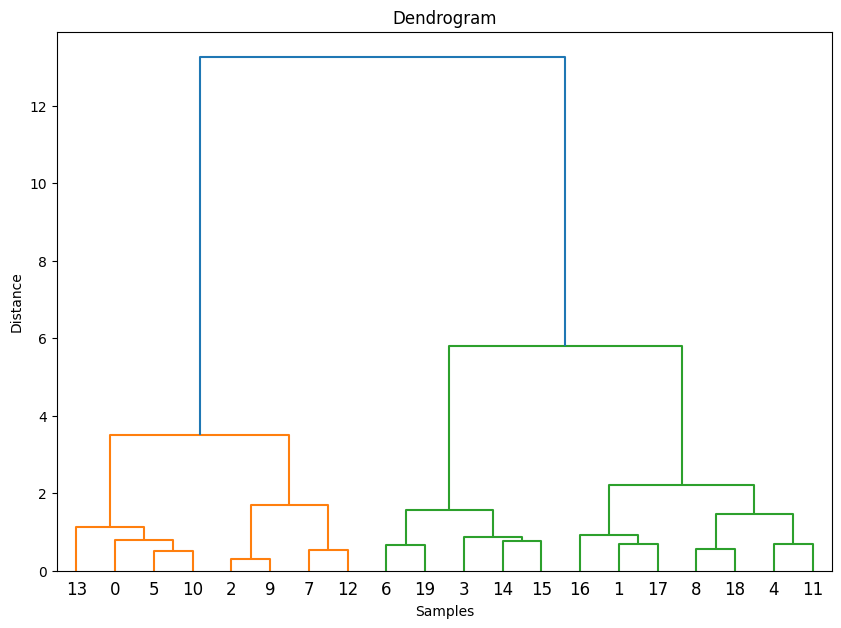

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using Ward's method
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Step 3: Apply Agglomerative Clustering

In [15]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster_labels = agg_clustering.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Display the clustered data
df.head()

,Session_Duration,Pages_Visited,Items_in_Cart,Avg_Session_Value,Time_Spent_on_Site,Purchase_History,Cluster
0,23,5,3,100,150,5,1
1,45,8,6,300,180,12,0
2,15,2,1,80,70,2,1
3,67,10,9,450,230,15,0
4,34,7,4,200,140,10,0


# Dataset Analysis

Cluster 0:
    
Higher session duration: Users in this cluster spend more time on the site, visit more pages, and add more items to the cart.

High average session value: Their average session value and purchase history are significantly higher.

    
Cluster 1:

Lower session duration: Users in this cluster tend to spend less time on the site and visit fewer pages.

Lower engagement: They add fewer items to the cart and have a lower average session value and purchase history.

    
# Suggested Names for Clusters

Based on these observations:
    

Cluster 0: "High-Value Shoppers"
    

These users are highly engaged with the website, spend more time, visit more pages, and are likely to make high-value purchases.


Cluster 1: "Casual Browsers"

These users are less engaged, with shorter session durations, fewer items added to the cart, and lower overall spending.

In [17]:
# Assign cluster names
cluster_names = {0: 'High-Value Shoppers', 1: 'Casual Browsers'}
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

df.head()

,Session_Duration,Pages_Visited,Items_in_Cart,Avg_Session_Value,Time_Spent_on_Site,Purchase_History,Cluster,Cluster_Name
0,23,5,3,100,150,5,1,Casual Browsers
1,45,8,6,300,180,12,0,High-Value Shoppers
2,15,2,1,80,70,2,1,Casual Browsers
3,67,10,9,450,230,15,0,High-Value Shoppers
4,34,7,4,200,140,10,0,High-Value Shoppers


# Step 4: Visualize the Clustering Result

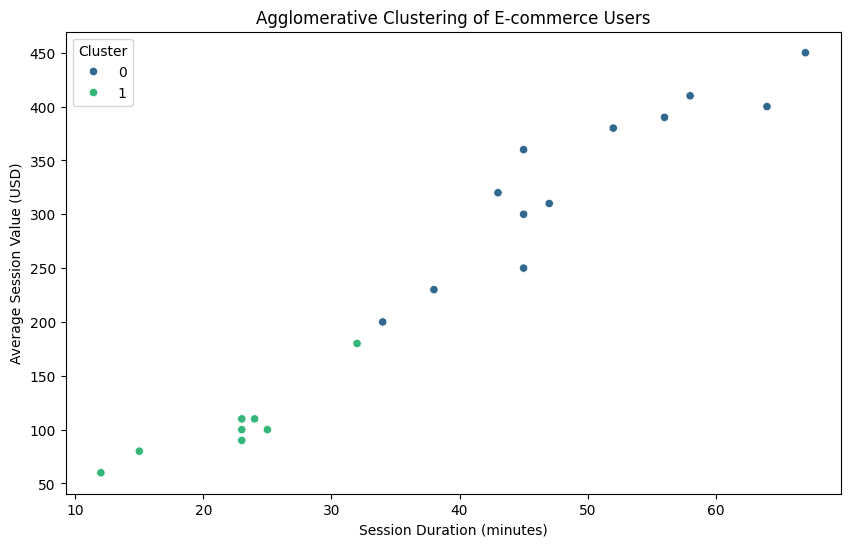

In [18]:
# Visualize the clusters using a scatter plot (e.g., based on Session_Duration and Avg_Session_Value)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Session_Duration'], y=df['Avg_Session_Value'], hue=df['Cluster'], palette='viridis')
plt.title('Agglomerative Clustering of E-commerce Users')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Average Session Value (USD)')
plt.show()

# Prediction System

For your information there is no way to predict new data points by agglomerative clustering but use you can only do filtering

or maping using the save clusters, 

In [ ]:
new_customer = (	23,	5, 3,	100	, 150	5	1)

,Session_Duration,Pages_Visited,Items_in_Cart,Avg_Session_Value,Time_Spent_on_Site,Purchase_History,Cluster,Cluster_Name
0,23,5,3,100,150,5,1,Casual Browsers
1,45,8,6,300,180,12,0,High-Value Shoppers
2,15,2,1,80,70,2,1,Casual Browsers
3,67,10,9,450,230,15,0,High-Value Shoppers
4,34,7,4,200,140,10,0,High-Value Shoppers
5,23,5,3,110,120,5,1,Casual Browsers
6,56,9,7,390,200,14,0,High-Value Shoppers
7,23,4,2,90,90,4,1,Casual Browsers
8,45,6,5,250,170,10,0,High-Value Shoppers
9,12,2,1,60,60,2,1,Casual Browsers
